# 01-2 패션 이미지의 분류 정확도를 높여라!

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/hm-dl/blob/main/01-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## LetNet-5

In [1]:
import keras
from keras import layers

In [2]:
lenet5 = keras.Sequential()
lenet5.add(layers.Input(shape=(28, 28, 1)))
lenet5.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                         padding='same'))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(120, activation='sigmoid'))
lenet5.add(layers.Dense(84, activation='sigmoid'))
lenet5.add(layers.Dense(10, activation='softmax'))

In [3]:
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

소프트맥스 함수: $f(x)_i = \dfrac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}}$

$f(x) = \dfrac{e^{z_1}+e^{z_2}+...+e^{z_k}}{\sum_{j=1}^{k}e^{z_j}}=1$

## Conv2D 층

In [4]:
import numpy as np

conv1 = layers.Conv2D(filters=10, kernel_size=(3, 3))
x = np.random.normal(size=(10, 28, 28, 1))
conv_out = conv1(x)
print(conv_out.shape)

(10, 26, 26, 10)


In [5]:
conv2 = layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(2, 2))
print(conv2(x).shape)

(10, 13, 13, 10)


In [6]:
conv3 = layers.Conv2D(filters=10, kernel_size=(3, 3), strides=(2, 2), padding='same')
print(conv3(x).shape)

(10, 14, 14, 10)


In [7]:
conv4 = layers.Conv2D(filters=10, kernel_size=(3, 3), padding='same')
print(conv4(x).shape)

(10, 28, 28, 10)


## AveragePooling2D 층과 Dense 층

In [8]:
pool1 = layers.AveragePooling2D(pool_size=2)
print(pool1(x).shape)

(10, 14, 14, 1)


In [9]:
pool2 = layers.AveragePooling2D(pool_size=3)
print(pool2(x).shape)

(10, 9, 9, 1)


$y = x \cdot W + b$

In [10]:
dense1 = layers.Dense(3)

In [11]:
x2 = np.array([[5, 7]])
print(dense1(x2).shape)

(1, 3)


In [12]:
print(dense1.get_weights())

[array([[ 0.04966497, -0.86518484, -1.0231528 ],
       [-0.9607337 , -0.45493615, -0.10699981]], dtype=float32), array([0., 0., 0.], dtype=float32)]


In [13]:
dense1.set_weights([
    np.array([[1, 2, 3], [4, 5, 6]]),
    np.array([0, 0, 0])
])

In [14]:
print(dense1(x2))

tf.Tensor([[33. 45. 57.]], shape=(1, 3), dtype=float32)


In [15]:
weight = dense1.get_weights()[0]
print(np.dot(x2, weight))

[[33. 45. 57.]]


In [16]:
output = lenet5(x)
print(output.shape)

(10, 10)


## 시그모이드 함수와 렐루 함수

시그모이드 함수: $f(x) = \dfrac{1}{1+e^{-x}}$

렐루 함수: $f(x) = \begin{cases}
                    \mbox{max}(0, x), & x\mbox{ >= 0 이면} \\
                    0,                & x\mbox{ < 0 이면}
                 \end{cases}$

In [17]:
a = np.array([-2, -1, 0, 1, 2])
print(a.clip(0))

[0 0 0 1 2]


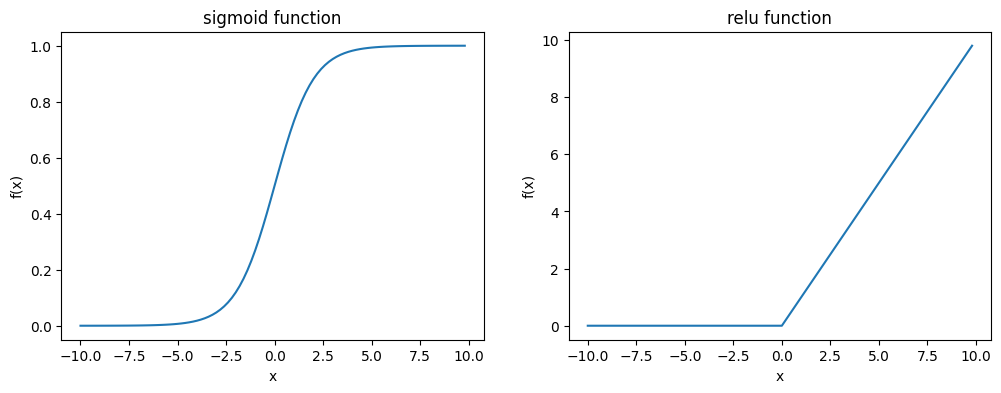

In [18]:
import matplotlib.pyplot as plt
from scipy.special import expit

x = np.arange(-10, 10, 0.2)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(x, expit(x))
axs[0].set_title('sigmoid function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[1].plot(x, x.clip(0))
axs[1].set_title('relu function')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
plt.show()

## 모델 훈련

In [19]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [20]:
print(train_target)

[9 0 0 ... 3 0 5]


In [21]:
train_input = train_input.reshape(-1, 28, 28, 1) / 255.0

In [22]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

$L = -\sum_{j=1}^m y_j log(\hat{y}_j)$

In [23]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('lenet5-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

In [24]:
lenet5.compile(loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
hist = lenet5.fit(train_scaled, train_target, epochs=20,
                  validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.4229 - loss: 1.5594 - val_accuracy: 0.7229 - val_loss: 0.7234
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7413 - loss: 0.6653 - val_accuracy: 0.7648 - val_loss: 0.6117
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7752 - loss: 0.5831 - val_accuracy: 0.7974 - val_loss: 0.5385
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8063 - loss: 0.5133 - val_accuracy: 0.8256 - val_loss: 0.4742
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8242 - loss: 0.4698 - val_accuracy: 0.8280 - val_loss: 0.4593
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8398 - loss: 0.4340 - val_accuracy: 0.8257 - val_loss: 0.4599
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8462 - loss: 0.4114 - val_accuracy: 0.8514 - val_loss: 0.3992
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8505 - loss: 0.4019 - 

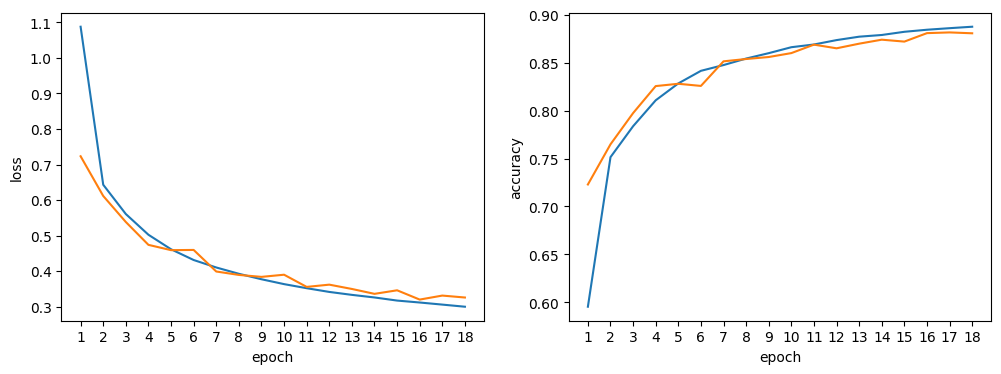

In [25]:
import matplotlib.pyplot as plt

epochs = range(1, len(hist.history['loss'])+1)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(epochs, hist.history['loss'])
axs[0].plot(epochs, hist.history['val_loss'])
axs[0].set_xticks(epochs)
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[1].plot(epochs, hist.history['accuracy'])
axs[1].plot(epochs, hist.history['val_accuracy'])
axs[1].set_xticks(epochs)
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
plt.show()